In [1]:
#Stats estimator to estimate parameter from probability distibuted samples
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def estimated_stats(dist_samples):
    mu = np.mean(dist_samples)
    variance = np.sum((dist_samples - mu)**2) / (len(dist_samples)-1) #formula STD from Gilbert Strang
    return mu, np.sqrt(variance)

In [3]:
mu = [0,5,8,1,2] #Random mu for different blocks sequence
sigma = [0.02, 2, 0.5, 0.9, 1] #Random sigma for different blocks sequence
N = 40 # block size
L = len(mu) * N #sequence
dist_samples = []
for i in range(len(mu)):
    dist_samples.append(np.random.normal(loc=mu[i], scale=sigma[i], size=N))

Original mu = [0, 5, 8, 1, 2], sigma = [0.02, 2, 0.5, 0.9, 1]
Estimated mu = 2.098122859462051, sigma = 1.0458048612630924


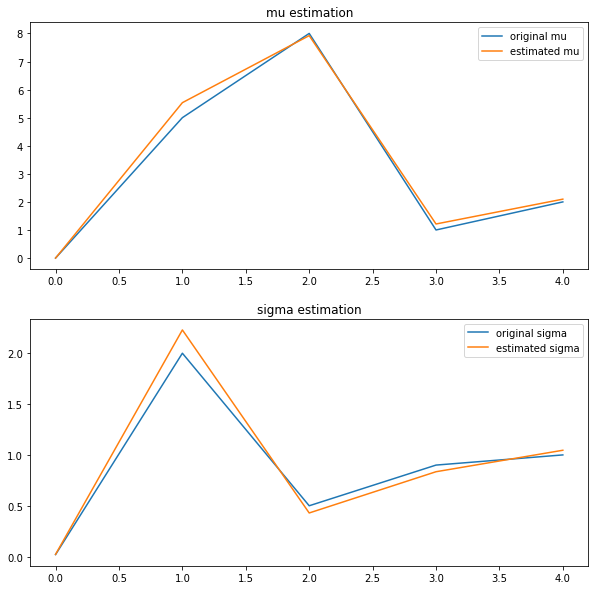

In [7]:
#estimate mu and sigma for each block
estimated_mu = []
estimate_sigma = []
for ii in range(len(mu)):
    est_mu , est_sigma = estimated_stats(dist_samples[ii])
    estimated_mu.append(est_mu)
    estimate_sigma.append(est_sigma)
print('Original mu = {}, sigma = {}'.format(mu, sigma))
print('Estimated mu = {}, sigma = {}'.format(est_mu, est_sigma))

plt.figure(figsize = (10,10))
ax1 = plt.subplot(211)
ax1.plot(mu)
ax1.plot(estimated_mu)
ax1.set_title('mu estimation')
ax1.legend(('original mu', 'estimated mu'))
ax2 = plt.subplot(212)
ax2.plot(sigma)
ax2.plot(estimate_sigma)
ax2.set_title('sigma estimation')
ax2.legend(('original sigma', 'estimated sigma'))

In [8]:
#mean and sigma for individual group of N block
# create a mean and sigma array from original and take mean for each block for smoothing
block_mu = np.repeat(mu, N)
block_sigma = np.repeat(sigma, N)
g = (1/N) * np.ones(N) #as a impulse response to take moving avg for mean
avg_mu  = np.convolve(block_mu, g, mode='same')
#average standard deviation = sqrt((sigma1^2 + d1^2) + (sigma2^2 + d2^2) +....+ (sigmaN^2 + dN^2)/N)
#d1 = mu_avg - mu1
d = avg_mu - block_mu
avg_sigma = np.sqrt(np.convolve((block_sigma**2 + d**2), g, mode= 'same'))

Original mu = [0, 5, 8, 1, 2], sigma = [0.02, 2, 0.5, 0.9, 1]
Estimated mu = 2.098122859462051, sigma = 1.0458048612630924


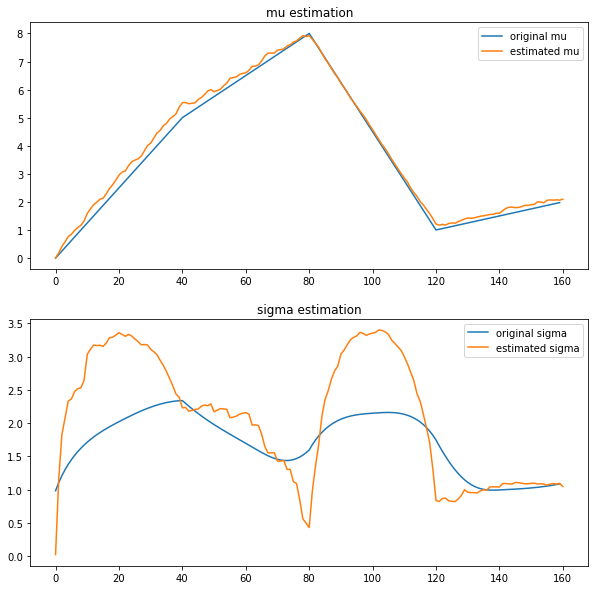

In [9]:
# estimate mu and sigma with shifted window
dist_samples = np.asarray(dist_samples).flatten()
estimated_mu = []
estimate_sigma = []
init = 0
while(len(dist_samples[init:])>=N):
    est_mu, est_sigma = estimated_stats(dist_samples[init:init+N])
    estimated_mu.append(est_mu)
    estimate_sigma.append(est_sigma)
    init += 1
print('Original mu = {}, sigma = {}'.format(mu, sigma))
print('Estimated mu = {}, sigma = {}'.format(est_mu, est_sigma))

plt.figure(figsize = (10,10))
ax1 = plt.subplot(211)
ax1.plot(avg_mu[int(N/2):int(- N/2)]) #remove first N/2 and last N/2 entries to match sliding window
ax1.plot(estimated_mu)
ax1.set_title('mu estimation')
ax1.legend(('original mu', 'estimated mu'))
ax2 = plt.subplot(212)
ax2.plot(avg_sigma[int(N/2):int(- N/2)])
ax2.plot(estimate_sigma)
ax2.set_title('sigma estimation')
ax2.legend(('original sigma', 'estimated sigma'))